#Question 1. 
Select a subset of relevant attributes from the given dataset that are necessary to know about the total
volume of avocados with product lookup codes (PLU) 4046, 4225, 4770) which are of organic type. (Use
AVOCADO dataset)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from prettytable import PrettyTable
from itertools import combinations
import scipy.stats


df_avo = pd.read_csv('Avocado_Dataset.csv')
new_df = df_avo[['Total Volume', '4046', '4225', '4770', 'type']]
new_df = new_df[new_df['type']=='organic']
new_df

,Total Volume,4046,4225,4770,type
9126,989.55,8.16,88.59,0.00,organic
9127,1163.03,30.24,172.14,0.00,organic
9128,995.96,10.44,178.70,0.00,organic
9129,1158.42,90.29,104.18,0.00,organic
9130,831.69,0.00,94.73,0.00,organic
...,...,...,...,...,...
18245,13888.04,1191.70,3431.50,0.00,organic
18246,13766.76,1191.92,2452.79,727.94,organic
18247,16205.22,1527.63,2981.04,727.01,organic
18248,17489.58,2894.77,2356.13,224.53,organic


# Question 2
Discard all duplicate entries in the dataset given and fill all the missing values in the attribute
“AveragePrice” as 1.25. Also print the size of the dataset before and after removing duplicates. (Use Trail
dataset)

In [27]:
df_trail = pd.read_csv('Trail.csv')

# size before dropping duplicates..
print(df_trail.shape)


df_trail.drop_duplicates(inplace=True)  # duplicate rows except the first one is deleted.
# size after dropping duplicates
print(df_trail.shape)


# fill all the missing values in the attribute “AveragePrice” as 1.25. 
col = []
for i in range(len(df_trail['AveragePrice'])):
    nan = False
    for x in str(df_trail['AveragePrice'].iloc[i]):       # checking each character wheather it is a digit(0-9) or decimal point(.) 
        if( not (x.isdigit() or x=='.') ):
            nan = True
            break

        
    if(nan):  
        col.append(1.25)   
    else:   
        col.append( round(float(df_trail['AveragePrice'].iloc[i]), 2) ) 

df_trail['AveragePrice'] = col
df_trail.head(15)

(202, 13)
(195, 13)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
1,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
3,22-11-2015,1.25,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
5,13-12-2015,1.21,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,organic,2015,xxxx
6,06-12-2015,1.21,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,organic,2015,xxxx
7,29-11-2015,1.21,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,organic,2015,yyyy
8,22-11-2015,1.21,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,organic,2015,yyyy
15,22-03-2015,1.12,46346.85,2141.83,34313.56,141.80,9749.66,9252.60,497.06,0.0,conventional,2015,Albany
16,15-03-2015,1.11,43045.79,2128.26,30447.17,99.67,10370.69,9989.59,381.10,0.0,conventional,2015,Albany


# Question 3
Binarize the attribute “Year”. Set the threshold above 2016 and print it without truncation. (Use AVOCADO
dataset)

In [28]:
df_avo = pd.read_csv('Avocado_Dataset.csv')
df_avo["binary_date"] = df_avo['year'] > 2016
# df_avo = df_avo.drop(df_avo[df_avo.year <= 2016].index)   # with trancation
df_avo

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,binary_date
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,False
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,False
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,False
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,False
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,True
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,True
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,True
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,True


# Question 4
Transform all categorical attributes in the dataset AVOCADO using Integer Encoding.

In [29]:
'''
Label / integers encoding: 
Integer encoding consist in replacing the categories by digits from 1 to n (or 0 to n-1, depending the implementation), where n is the number 
of distinct categories of the variable.

Need: 
Most of the Machine learning algorithms can not handle categorical variables unless we convert them to numerical values. Many algorithm's 
performances vary based on how Categorical variables are encoded.
'''


int_encoder = preprocessing.LabelEncoder()

df_avo = pd.read_csv('Avocado_Dataset.csv')

df_avo['region']= int_encoder.fit_transform(df_avo['region'])
df_avo['type']= int_encoder.fit_transform(df_avo['type'])
df_avo['year']= int_encoder.fit_transform(df_avo['year'])

df_avo

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,3,53
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,3,53
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,3,53
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,3,53


# Question 5
Transform the attribute = “Region” in the given dataset AVOCADO using One-Hot Encoding.

In [30]:
'''
one-hot encoding comes in help because it transforms categorical data into numerical; in other words: it transforms strings into numbers so 
that we can apply our Machine Learning algorithms without any problems.
'''

# Create an instance of One-hot-encoder
enc = OneHotEncoder()

df_avo = pd.read_csv('Avocado_Dataset.csv')

'''
NOTE: we have converted the enc.fit_transform() method to array(toarray() returns an ndarray) because the fit_transform method of OneHotEncoder returns SpiPy sparse 
matrix this enables us to save space when we have huge  number of categorical variables.

Dense matrix representation: 
 [[1 0 0 0 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]
Sparse matrix: 
   (0, 0)	1
   (1, 2)	2
   (1, 5)	1
   (2, 3)	2
'''
enc_df = pd.DataFrame(enc.fit_transform(df_avo[['region']]).toarray())
df_avo = df_avo.join(enc_df)
df_avo

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,44,45,46,47,48,49,50,51,52,53
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Question 6
Ignore the tuples that hold missing values and print the subset of data from AVOCADO dataset excluding
“NaN” values.

In [31]:
from IPython.display import Javascript
display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
pd.set_option('display.expand_frame_repr', False) 

df_avo = pd.read_csv('Avocado_Dataset.csv')

drop_columns = []           # will store the index of columns to be dropped (only Average price column is having null or missing values)
for i in df_avo['AveragePrice'].index:
    for x in str(df_avo['AveragePrice'].loc[i]):
        if( not (x.isdigit() or x=='.') ):
            drop_columns.append(i)
            break
            

df_avo.drop(drop_columns, inplace=True)
print(df_avo.head(50))

<IPython.core.display.Javascript object>

          Date AveragePrice  Total Volume       4046       4225     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  year   region
0   27-12-2015         1.33      64236.62    1036.74   54454.85    48.16     8696.87     8603.62       93.25         0.00  conventional  2015   Albany
1   20-12-2015         1.35      54876.98     674.28   44638.81    58.33     9505.56     9408.07       97.49         0.00  conventional  2015   Albany
2   13-12-2015         0.93     118220.22     794.70  109149.67   130.50     8145.35     8042.21      103.14         0.00  conventional  2015   Albany
3   06-12-2015         1.08      78992.15    1132.00   71976.41    72.58     5811.16     5677.40      133.76         0.00  conventional  2015   Albany
4   29-11-2015         1.29      51039.60     941.48   43838.39    75.78     6183.95     5986.26      197.69         0.00  conventional  2015   Albany
12  04-10-2015         1.31      61007.10    2268.32   49880.67   101.36     8756.75     8379.

#Question 7
Drop the attribute that has high nullity as it facilitates efficient prediction. (Use AVOCADO dataset)

In [32]:
df_avo = pd.read_csv('Avocado_Dataset.csv')

# attribute which has high null or invald values..
print(df_avo.isnull().sum())

Date             0
AveragePrice    28
Total Volume     0
4046             0
4225             0
4770             0
Total Bags       0
Small Bags       0
Large Bags       0
XLarge Bags      0
type             0
year             0
region           0
dtype: int64


In [33]:
# we can see only AveragePrice has high null value, so drop this column  
df_avo = df_avo.drop(['AveragePrice'], axis=1)       #  “axis 0” represents rows and “axis 1” represents columns
df_avo

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,07-01-2018,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


# Question 8
Study the entire dataset and report the complete statistical summary about the data (Use AVOCADO
dataset)
  * Dimension of the dataset
  * Most frequently occurring value under every attribute.
  * Datatype of every attribute
  * Count
  * Mean
  * Standard Deviation
  * Minimum Value
  * Maximum value
  * 25% o
  * Median i.e. 50%
  * 75%
  * Find whether the class distribution of dataset is imbalanced. (Note: Fix the class label as “Type” in the
  given dataset)
  * Correlation matrix
  * Skewness of every attribute.

In [34]:
df_avo = pd.read_csv('Avocado_Dataset.csv')

# Dimension of the dataset
df_avo.shape

(18250, 13)

In [35]:
# Most frequently occurring value under every attribute.
t = PrettyTable(['Attribute', 'Most freq', 'Frequency'])

for each in df_avo:
    t.add_row([each, df_avo[each].value_counts().index[0], df_avo[each].value_counts().iloc[0]])

print(t)


+--------------+--------------+-----------+
|  Attribute   |  Most freq   | Frequency |
+--------------+--------------+-----------+
|     Date     |  18-03-2018  |    109    |
| AveragePrice |     1.15     |    201    |
| Total Volume |   4103.97    |     2     |
|     4046     |     0.0      |    242    |
|     4225     |     0.0      |     61    |
|     4770     |     0.0      |    5498   |
|  Total Bags  |     0.0      |     15    |
|  Small Bags  |     0.0      |    159    |
|  Large Bags  |     0.0      |    2370   |
| XLarge Bags  |     0.0      |   12049   |
|     type     | conventional |    9126   |
|     year     |     2017     |    5722   |
|    region    |    Albany    |    338    |
+--------------+--------------+-----------+


In [36]:
# Datatype of every attribute
print(df_avo.dtypes)

Date             object
AveragePrice     object
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object


In [ ]:
'''
  ● Count
  ● Mean
  ● Standard Deviation
  ● Minimum Value
  ● Maximum value
  ● 25% 
  ● Median i.e. 50%
  ● 75%
'''
df_avo.describe()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1.825000e+04,1.825000e+04,1.825000e+04,1.825000e+04,1.825000e+04,1.825000e+04,1.825000e+04,18250.000000,18250.000000
mean,8.505983e+05,2.929925e+05,2.951385e+05,2.283848e+04,2.396267e+05,1.821854e+05,5.433512e+04,3106.256292,2016.148000
std,3.453456e+06,1.264956e+06,1.204089e+06,1.074613e+05,9.862168e+05,7.461591e+05,2.439596e+05,17692.424825,0.940013
min,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.083963e+04,8.542100e+02,3.008097e+03,0.000000e+00,5.089083e+03,2.850323e+03,1.275800e+02,0.000000,2015.000000
50%,1.073655e+05,8.643200e+03,2.905888e+04,1.849750e+02,3.974118e+04,2.635161e+04,2.647270e+03,0.000000,2016.000000
75%,4.329527e+05,1.110087e+05,1.501663e+05,6.242055e+03,1.107811e+05,8.333621e+04,2.201828e+04,132.432500,2017.000000
max,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [37]:
# Find whether the class distribution of dataset is imbalanced. (Note: Fix the class label as “Type” in the given dataset)
print(df_avo['type'].value_counts())
print('\ncount for both type is almost same. so it is balanced')

conventional    9126
organic         9124
Name: type, dtype: int64

count for both type is almost same. so it is balanced


In [38]:
# Correlation matrix
df_avo.corr()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Total Volume,1.000000,0.977863,0.974181,0.872203,0.963047,0.967238,0.880640,0.747158,0.017165
4046,0.977863,1.000000,0.926110,0.833390,0.920057,0.925280,0.838645,0.699378,0.003328
4225,0.974181,0.926110,1.000000,0.887855,0.905788,0.916031,0.810016,0.688809,-0.009584
4770,0.872203,0.833390,0.887855,1.000000,0.792315,0.802733,0.698472,0.679862,-0.036550
Total Bags,0.963047,0.920057,0.905788,0.792315,1.000000,0.994335,0.943009,0.804233,0.071520
Small Bags,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063883
Large Bags,0.880640,0.838645,0.810016,0.698472,0.943009,0.902589,1.000000,0.710859,0.087858
XLarge Bags,0.747158,0.699378,0.688809,0.679862,0.804233,0.806845,0.710859,1.000000,0.081005
year,0.017165,0.003328,-0.009584,-0.036550,0.071520,0.063883,0.087858,0.081005,1.000000


In [39]:
# Skewness of every attribute.
df_avo.skew()

<ipython-input-39-8955ef10e033>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_avo.skew()


Total Volume     9.007930
4046             8.648456
4225             8.942706
4770            10.159671
Total Bags       9.756334
Small Bags       9.540917
Large Bags       9.796719
XLarge Bags     13.140106
year             0.215371
dtype: float64

# Question 9
Test drive the use of Gini Index, Information Gain, Entropy and other measures that are supported in your
platform, performing the role of data selection.

#Entropy

Entropy is an information theory metric that measures the impurity or uncertainty in a group of observations. It determines how a decision tree chooses to split data. The image below gives a better description of the purity of a set.
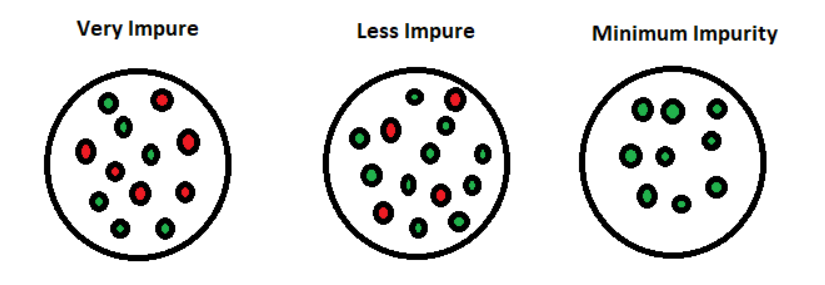

Consider a dataset with N classes. The entropy may be calculated using the formula below:

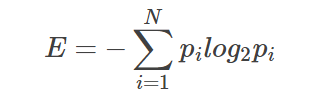
pi is the probability of randomly selecting an example in class i.


#Gini index

The gini impurity index is defined as follows:

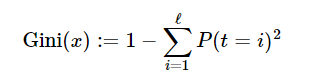
 
The idea with Gini index is the same as in entropy in the sense that the more heterogenous and impure a feature is, the higher the Gini index.

A nice property of the Gini index is that it is always between 0 and 1, and this may make it easier to compare Gini indices across different features.


# Information gain
We can define information gain as a measure of how much information a feature provides about a class. Information gain helps to determine the order of attributes in the nodes of a decision tree.

The main node is referred to as the parent node, whereas sub-nodes are known as child nodes. We can use information gain **to determine how good the splitting of nodes in a decision tree.**

It can help us determine the **quality of splitting.** The calculation of information gain...

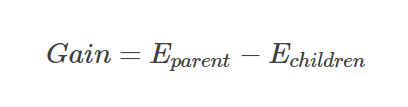

</br>

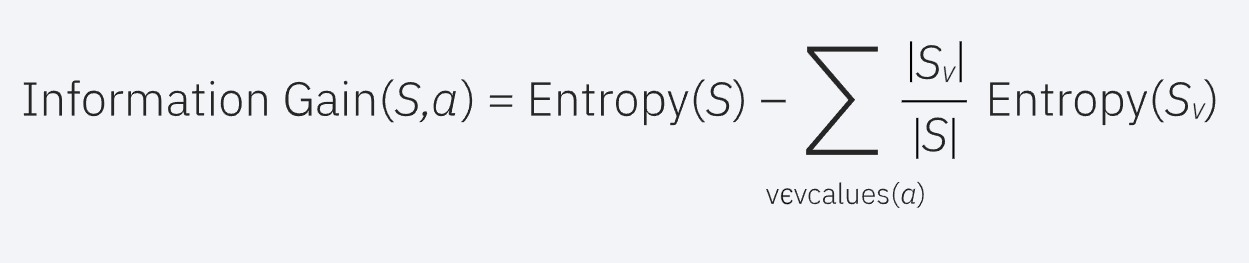

In [40]:


def compute_impurity(feature, impurity_criterion):
    """
    This function calculates impurity of a feature.
    Supported impurity criteria: 'entropy', 'gini'
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
        
    return(round(impurity, 3))




def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy', 'gini'
    """
    
    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)
            
    target_entropy = compute_impurity(df[target], split_criterion)

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    print('impurity of partitions:', entropy_list)
    print('weights of partitions:', weight_list)

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    print('remaining impurity:', feature_remaining_impurity)
    
    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)
    
    print('====================')

    return(information_gain)


df_veg = pd.read_csv('vegitation.csv')


print('impurity using entropy:', compute_impurity(df_veg['vegetation'], 'entropy'))
print('impurity using gini index:', compute_impurity(df_veg['vegetation'], 'gini'))
print('\n\n\n')

split_criterion = 'entropy'
for feature in df_veg.drop(columns='vegetation').columns:
    feature_info_gain = comp_feature_information_gain(df_veg, 'vegetation', feature, split_criterion)

impurity using entropy: 1.557
impurity using gini index: 0.653




target feature: vegetation
descriptive_feature: stream
split criterion: entropy
impurity of partitions: [0.918, 1.5]
weights of partitions: [0.429, 0.571]
remaining impurity: 1.250322
information gain: 0.306678
target feature: vegetation
descriptive_feature: slope
split criterion: entropy
impurity of partitions: [1.371, -0.0, -0.0]
weights of partitions: [0.714, 0.143, 0.143]
remaining impurity: 0.9788939999999999
information gain: 0.578106
target feature: vegetation
descriptive_feature: elevation
split criterion: entropy
impurity of partitions: [0.918, -0.0, 1.0, -0.0]
weights of partitions: [0.429, 0.143, 0.286, 0.143]
remaining impurity: 0.6798219999999999
information gain: 0.877178


# Question 10
Test drive the implementation support in your platform of choice for data preprocessing phases such as
cleaning, selection, transformation, integration in addition to the earlier exercises.

In [41]:
# cleaning
df_avo = pd.read_csv('Avocado_Dataset.csv')

print(df_avo.isnull().sum())

drop_columns = []           # will store the index of columns to be dropped (only Average price column is having null or missing values)
for i in df_avo['AveragePrice'].index:
    for x in str(df_avo['AveragePrice'].loc[i]):
        if( not (x.isdigit() or x=='.') ):
            drop_columns.append(i)
            break
            

df_avo.drop(drop_columns, inplace=True)
print('\n\n')
print(df_avo.isnull().sum())

Date             0
AveragePrice    28
Total Volume     0
4046             0
4225             0
4770             0
Total Bags       0
Small Bags       0
Large Bags       0
XLarge Bags      0
type             0
year             0
region           0
dtype: int64



Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [42]:
#selection
df_sel = df_avo[df_avo['Total Volume'] > 10000000]
df_sel

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2652,27-12-2015,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS
2653,20-12-2015,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS
2654,13-12-2015,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS
2655,06-12-2015,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS
2656,29-11-2015,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9098,28-01-2018,1.09,40171640.84,14551799.50,12119884.61,575974.74,12923981.99,9749412.19,3041125.42,133444.38,conventional,2018,TotalUS
9099,21-01-2018,1.08,42939821.55,14218843.83,13929702.12,928815.12,13862460.48,9866218.28,3789722.90,206519.30,conventional,2018,TotalUS
9100,14-01-2018,1.2,37299945.22,12600918.24,11866197.84,652808.40,12180020.74,8128241.88,3917569.95,134208.91,conventional,2018,TotalUS
9101,07-01-2018,1.13,36703156.72,13730992.75,10781339.21,677714.86,11513109.90,8231766.23,3130919.10,150424.57,conventional,2018,TotalUS


In [43]:
# transformation
df_avo['trans'] = df_avo['4046'].apply(lambda x: np.log2(x))
df_avo

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,trans
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,10.017838
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,9.397204
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,9.634267
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,10.144658
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,9.878787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,10.218805
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,10.219072
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,10.577079
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,11.499233


In [44]:
# integration


df1 = pd.DataFrame({'id': ['A01', 'A02', 'A03', 'A04'],
                    'Name': ['ABC', 'PQR', 'DEF', 'GHI']})
  
df2 = pd.DataFrame({'id': ['B05', 'B06', 'B07', 'B08'],
                    'Name': ['XYZ', 'TUV', 'MNO', 'JKL']})
  
df3 = pd.DataFrame({'City': ['MUMBAI', 'PUNE', 'MUMBAI', 'DELHI'],
                    'Age': ['12', '13', '14', '12']})
  
  
# appending multiple DataFrame
result = df1.append([df2, df3])
result

,id,Name,City,Age
0,A01,ABC,NaN,NaN
1,A02,PQR,NaN,NaN
2,A03,DEF,NaN,NaN
3,A04,GHI,NaN,NaN
0,B05,XYZ,NaN,NaN
1,B06,TUV,NaN,NaN
2,B07,MNO,NaN,NaN
3,B08,JKL,NaN,NaN
0,NaN,NaN,MUMBAI,12
1,NaN,NaN,PUNE,13
